# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 26.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 26.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 155 kB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 27.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp9 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [11]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5246403,-77.563301,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 15 21:46:16 +0000 2021'
'Mon Nov 15 21:45:18 +0000 2021'
'Mon Nov 15 21:44:39 +0000 2021'
'Mon Nov 15 21:40:03 +0000 2021'
'Mon Nov 15 21:31:29 +0000 2021'
'Mon Nov 15 21:31:24 +0000 2021'
'Mon Nov 15 21:30:39 +0000 2021'
'Mon Nov 15 21:28:21 +0000 2021'
'Mon Nov 15 21:26:34 +0000 2021'
'Mon Nov 15 21:25:01 +0000 2021'
'Mon Nov 15 21:21:58 +0000 2021'
'Mon Nov 15 21:20:01 +0000 2021'
'Mon Nov 15 21:15:00 +0000 2021'
'Mon Nov 15 21:13:27 +0000 2021'
'Mon Nov 15 21:09:19 +0000 2021'
'Mon Nov 15 21:09:00 +0000 2021'
'Mon Nov 15 21:08:10 +0000 2021'
'Mon Nov 15 21:05:40 +0000 2021'
'Mon Nov 15 21:05:28 +0000 2021'
'Mon Nov 15 21:05:13 +0000 2021'
'Mon Nov 15 21:01:01 +0000 2021'
'Mon Nov 15 21:00:19 +0000 2021'
'Mon Nov 15 21:00:17 +0000 2021'
'Mon Nov 15 21:00:17 +0000 2021'
'Mon Nov 15 21:00:12 +0000 2021'
'Mon Nov 15 21:00:11 +0000 2021'
'Mon Nov 15 21:00:00 +0000 2021'
'Mon Nov 15 20:57:51 +0000 2021'
'Mon Nov 15 20:57:25 +0000 2021'
'Mon Nov 15 20:51:37 +0000 2021'
'Mon Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 15 18:40:00 +0000 2021'
'Mon Nov 15 18:39:02 +0000 2021'
'Mon Nov 15 18:35:23 +0000 2021'
'Mon Nov 15 18:35:23 +0000 2021'
'Mon Nov 15 18:32:34 +0000 2021'
'Mon Nov 15 18:30:37 +0000 2021'
'Mon Nov 15 18:30:16 +0000 2021'
'Mon Nov 15 18:30:16 +0000 2021'
'Mon Nov 15 18:26:08 +0000 2021'
'Mon Nov 15 18:20:12 +0000 2021'
'Mon Nov 15 18:20:03 +0000 2021'
'Mon Nov 15 18:16:14 +0000 2021'
'Mon Nov 15 18:15:50 +0000 2021'
'Mon Nov 15 18:11:49 +0000 2021'
'Mon Nov 15 18:11:13 +0000 2021'
'Mon Nov 15 18:10:05 +0000 2021'
'Mon Nov 15 18:10:00 +0000 2021'
'Mon Nov 15 18:08:02 +0000 2021'
'Mon Nov 15 18:06:01 +0000 2021'
'Mon Nov 15 18:04:41 +0000 2021'
'Mon Nov 15 18:04:41 +0000 2021'
'Mon Nov 15 18:03:53 +0000 2021'
'Mon Nov 15 18:02:14 +0000 2021'
'Mon Nov 15 18:01:57 +0000 2021'
'Mon Nov 15 18:01:23 +0000 2021'
'Mon Nov 15 18:01:12 +0000 2021'
'Mon Nov 15 18:01:11 +0000 2021'
'Mon Nov 15 18:00:59 +0000 2021'
'Mon Nov 15 18:00:13 +0000 2021'
'Mon Nov 15 18:00:01 +0000 2021'
'Mon Nov 1

'Mon Nov 15 08:35:21 +0000 2021'
'Mon Nov 15 08:17:13 +0000 2021'
'Mon Nov 15 08:01:47 +0000 2021'
'Mon Nov 15 08:00:12 +0000 2021'
'Mon Nov 15 07:54:52 +0000 2021'
'Mon Nov 15 07:10:03 +0000 2021'
'Mon Nov 15 06:29:59 +0000 2021'
'Mon Nov 15 06:28:16 +0000 2021'
'Mon Nov 15 06:07:19 +0000 2021'
'Mon Nov 15 06:00:20 +0000 2021'
'Mon Nov 15 05:32:24 +0000 2021'
'Mon Nov 15 04:55:53 +0000 2021'
'Mon Nov 15 04:47:32 +0000 2021'
'Mon Nov 15 04:45:53 +0000 2021'
'Mon Nov 15 04:40:51 +0000 2021'
'Mon Nov 15 04:35:16 +0000 2021'
'Mon Nov 15 04:30:24 +0000 2021'
'Mon Nov 15 04:28:59 +0000 2021'
'Mon Nov 15 03:50:48 +0000 2021'
'Mon Nov 15 03:41:32 +0000 2021'
'Mon Nov 15 03:41:21 +0000 2021'
'Mon Nov 15 03:30:13 +0000 2021'
'Mon Nov 15 03:19:36 +0000 2021'
'Mon Nov 15 03:16:56 +0000 2021'
'Mon Nov 15 03:07:19 +0000 2021'
'Mon Nov 15 03:06:02 +0000 2021'
'Mon Nov 15 03:01:40 +0000 2021'
'Mon Nov 15 02:54:32 +0000 2021'
'Mon Nov 15 02:36:48 +0000 2021'
'Mon Nov 15 02:31:05 +0000 2021'
'Mon Nov 1

'Sun Nov 14 07:54:06 +0000 2021'
'Sun Nov 14 07:54:05 +0000 2021'
'Sun Nov 14 07:54:03 +0000 2021'
'Sun Nov 14 07:31:33 +0000 2021'
'Sun Nov 14 07:27:15 +0000 2021'
'Sun Nov 14 07:26:15 +0000 2021'
'Sun Nov 14 06:49:41 +0000 2021'
'Sun Nov 14 06:12:57 +0000 2021'
'Sun Nov 14 06:01:58 +0000 2021'
'Sun Nov 14 05:54:38 +0000 2021'
'Sun Nov 14 05:34:37 +0000 2021'
'Sun Nov 14 05:10:43 +0000 2021'
'Sun Nov 14 04:47:20 +0000 2021'
'Sun Nov 14 04:37:00 +0000 2021'
'Sun Nov 14 04:32:31 +0000 2021'
'Sun Nov 14 04:31:40 +0000 2021'
'Sun Nov 14 04:00:26 +0000 2021'
'Sun Nov 14 02:53:53 +0000 2021'
'Sun Nov 14 02:50:59 +0000 2021'
'Sun Nov 14 02:48:05 +0000 2021'
'Sun Nov 14 02:43:49 +0000 2021'
'Sun Nov 14 02:33:11 +0000 2021'
'Sun Nov 14 02:03:25 +0000 2021'
'Sun Nov 14 02:00:50 +0000 2021'
'Sun Nov 14 01:49:43 +0000 2021'
'Sun Nov 14 01:49:00 +0000 2021'
'Sun Nov 14 01:35:54 +0000 2021'
'Sun Nov 14 01:33:14 +0000 2021'
'Sun Nov 14 01:25:47 +0000 2021'
'Sun Nov 14 01:21:44 +0000 2021'
'Sun Nov 1

'Sat Nov 13 03:43:21 +0000 2021'
'Sat Nov 13 03:42:33 +0000 2021'
'Sat Nov 13 03:39:11 +0000 2021'
'Sat Nov 13 03:34:35 +0000 2021'
'Sat Nov 13 03:33:27 +0000 2021'
'Sat Nov 13 03:29:45 +0000 2021'
'Sat Nov 13 03:21:04 +0000 2021'
'Sat Nov 13 03:02:47 +0000 2021'
'Sat Nov 13 02:58:28 +0000 2021'
'Sat Nov 13 02:51:14 +0000 2021'
'Sat Nov 13 02:47:54 +0000 2021'
'Sat Nov 13 02:47:26 +0000 2021'
'Sat Nov 13 02:30:55 +0000 2021'
'Sat Nov 13 02:21:43 +0000 2021'
'Sat Nov 13 02:20:14 +0000 2021'
'Sat Nov 13 02:18:58 +0000 2021'
'Sat Nov 13 02:17:59 +0000 2021'
'Sat Nov 13 02:17:02 +0000 2021'
'Sat Nov 13 02:08:00 +0000 2021'
'Sat Nov 13 02:01:14 +0000 2021'
'Sat Nov 13 02:00:04 +0000 2021'
'Sat Nov 13 01:51:53 +0000 2021'
'Sat Nov 13 01:51:29 +0000 2021'
'Sat Nov 13 01:49:15 +0000 2021'
'Sat Nov 13 01:45:37 +0000 2021'
'Sat Nov 13 01:40:23 +0000 2021'
'Sat Nov 13 01:32:33 +0000 2021'
'Sat Nov 13 01:27:49 +0000 2021'
'Sat Nov 13 01:09:27 +0000 2021'
'Sat Nov 13 01:05:00 +0000 2021'
'Sat Nov 1

'Fri Nov 12 17:22:39 +0000 2021'
'Fri Nov 12 17:21:50 +0000 2021'
'Fri Nov 12 17:19:58 +0000 2021'
'Fri Nov 12 17:19:51 +0000 2021'
'Fri Nov 12 17:14:08 +0000 2021'
'Fri Nov 12 17:14:06 +0000 2021'
'Fri Nov 12 17:11:31 +0000 2021'
'Fri Nov 12 17:07:23 +0000 2021'
'Fri Nov 12 17:06:40 +0000 2021'
'Fri Nov 12 17:06:01 +0000 2021'
'Fri Nov 12 17:05:09 +0000 2021'
'Fri Nov 12 17:02:41 +0000 2021'
'Fri Nov 12 17:02:34 +0000 2021'
'Fri Nov 12 17:00:21 +0000 2021'
'Fri Nov 12 17:00:15 +0000 2021'
'Fri Nov 12 17:00:03 +0000 2021'
'Fri Nov 12 17:00:02 +0000 2021'
'Fri Nov 12 16:58:50 +0000 2021'
'Fri Nov 12 16:54:10 +0000 2021'
'Fri Nov 12 16:52:20 +0000 2021'
'Fri Nov 12 16:51:48 +0000 2021'
'Fri Nov 12 16:50:36 +0000 2021'
'Fri Nov 12 16:50:19 +0000 2021'
'Fri Nov 12 16:48:34 +0000 2021'
'Fri Nov 12 16:47:05 +0000 2021'
'Fri Nov 12 16:47:02 +0000 2021'
'Fri Nov 12 16:45:32 +0000 2021'
'Fri Nov 12 16:45:31 +0000 2021'
'Fri Nov 12 16:45:06 +0000 2021'
'Fri Nov 12 16:45:06 +0000 2021'
'Fri Nov 1

'Thu Nov 11 23:19:10 +0000 2021'
'Thu Nov 11 23:16:27 +0000 2021'
'Thu Nov 11 23:15:41 +0000 2021'
'Thu Nov 11 23:10:04 +0000 2021'
'Thu Nov 11 23:06:02 +0000 2021'
'Thu Nov 11 23:05:13 +0000 2021'
'Thu Nov 11 23:05:03 +0000 2021'
'Thu Nov 11 23:03:09 +0000 2021'
'Thu Nov 11 23:02:53 +0000 2021'
'Thu Nov 11 23:00:30 +0000 2021'
'Thu Nov 11 23:00:16 +0000 2021'
'Thu Nov 11 23:00:01 +0000 2021'
'Thu Nov 11 22:59:20 +0000 2021'
'Thu Nov 11 22:58:19 +0000 2021'
'Thu Nov 11 22:58:00 +0000 2021'
'Thu Nov 11 22:57:49 +0000 2021'
'Thu Nov 11 22:40:02 +0000 2021'
'Thu Nov 11 22:34:00 +0000 2021'
'Thu Nov 11 22:30:06 +0000 2021'
'Thu Nov 11 22:25:02 +0000 2021'
'Thu Nov 11 22:17:05 +0000 2021'
'Thu Nov 11 22:10:01 +0000 2021'
'Thu Nov 11 22:09:49 +0000 2021'
'Thu Nov 11 22:02:48 +0000 2021'
'Thu Nov 11 22:01:18 +0000 2021'
'Thu Nov 11 22:00:09 +0000 2021'
'Thu Nov 11 22:00:06 +0000 2021'
'Thu Nov 11 22:00:01 +0000 2021'
'Thu Nov 11 21:58:31 +0000 2021'
'Thu Nov 11 21:56:54 +0000 2021'
'Thu Nov 1

'Thu Nov 11 15:15:11 +0000 2021'
'Thu Nov 11 15:13:39 +0000 2021'
'Thu Nov 11 15:10:09 +0000 2021'
'Thu Nov 11 15:09:02 +0000 2021'
'Thu Nov 11 15:08:49 +0000 2021'
'Thu Nov 11 15:08:09 +0000 2021'
'Thu Nov 11 15:05:01 +0000 2021'
'Thu Nov 11 15:03:40 +0000 2021'
'Thu Nov 11 15:03:40 +0000 2021'
'Thu Nov 11 15:03:07 +0000 2021'
'Thu Nov 11 15:03:03 +0000 2021'
'Thu Nov 11 15:00:40 +0000 2021'
'Thu Nov 11 15:00:01 +0000 2021'
'Thu Nov 11 15:00:01 +0000 2021'
'Thu Nov 11 15:00:00 +0000 2021'
'Thu Nov 11 14:55:40 +0000 2021'
'Thu Nov 11 14:53:42 +0000 2021'
'Thu Nov 11 14:50:02 +0000 2021'
'Thu Nov 11 14:49:58 +0000 2021'
'Thu Nov 11 14:48:09 +0000 2021'
'Thu Nov 11 14:48:05 +0000 2021'
'Thu Nov 11 14:43:06 +0000 2021'
'Thu Nov 11 14:42:57 +0000 2021'
'Thu Nov 11 14:38:57 +0000 2021'
'Thu Nov 11 14:38:53 +0000 2021'
'Thu Nov 11 14:37:19 +0000 2021'
'Thu Nov 11 14:37:08 +0000 2021'
'Thu Nov 11 14:36:49 +0000 2021'
'Thu Nov 11 14:34:11 +0000 2021'
'Thu Nov 11 14:33:47 +0000 2021'
'Thu Nov 1

'Wed Nov 10 21:57:55 +0000 2021'
'Wed Nov 10 21:55:51 +0000 2021'
'Wed Nov 10 21:55:35 +0000 2021'
'Wed Nov 10 21:48:22 +0000 2021'
'Wed Nov 10 21:47:26 +0000 2021'
'Wed Nov 10 21:46:38 +0000 2021'
'Wed Nov 10 21:46:08 +0000 2021'
'Wed Nov 10 21:45:42 +0000 2021'
'Wed Nov 10 21:39:49 +0000 2021'
'Wed Nov 10 21:39:37 +0000 2021'
'Wed Nov 10 21:38:48 +0000 2021'
'Wed Nov 10 21:33:41 +0000 2021'
'Wed Nov 10 21:32:22 +0000 2021'
'Wed Nov 10 21:31:58 +0000 2021'
'Wed Nov 10 21:31:57 +0000 2021'
'Wed Nov 10 21:31:56 +0000 2021'
'Wed Nov 10 21:31:55 +0000 2021'
'Wed Nov 10 21:30:09 +0000 2021'
'Wed Nov 10 21:29:27 +0000 2021'
'Wed Nov 10 21:28:52 +0000 2021'
'Wed Nov 10 21:27:24 +0000 2021'
'Wed Nov 10 21:26:15 +0000 2021'
'Wed Nov 10 21:18:46 +0000 2021'
'Wed Nov 10 21:17:59 +0000 2021'
'Wed Nov 10 21:17:43 +0000 2021'
'Wed Nov 10 21:16:01 +0000 2021'
'Wed Nov 10 21:15:28 +0000 2021'
'Wed Nov 10 21:13:32 +0000 2021'
'Wed Nov 10 21:12:35 +0000 2021'
'Wed Nov 10 21:09:02 +0000 2021'
'Wed Nov 1

'Wed Nov 10 15:58:31 +0000 2021'
'Wed Nov 10 15:56:55 +0000 2021'
'Wed Nov 10 15:55:33 +0000 2021'
'Wed Nov 10 15:52:24 +0000 2021'
'Wed Nov 10 15:45:04 +0000 2021'
'Wed Nov 10 15:43:58 +0000 2021'
'Wed Nov 10 15:42:01 +0000 2021'
'Wed Nov 10 15:39:51 +0000 2021'
'Wed Nov 10 15:39:10 +0000 2021'
'Wed Nov 10 15:36:05 +0000 2021'
'Wed Nov 10 15:36:00 +0000 2021'
'Wed Nov 10 15:31:33 +0000 2021'
'Wed Nov 10 15:30:03 +0000 2021'
'Wed Nov 10 15:30:02 +0000 2021'
'Wed Nov 10 15:30:00 +0000 2021'
'Wed Nov 10 15:26:23 +0000 2021'
'Wed Nov 10 15:25:29 +0000 2021'
'Wed Nov 10 15:24:52 +0000 2021'
'Wed Nov 10 15:23:12 +0000 2021'
'Wed Nov 10 15:19:48 +0000 2021'
'Wed Nov 10 15:19:23 +0000 2021'
'Wed Nov 10 15:18:37 +0000 2021'
'Wed Nov 10 15:18:18 +0000 2021'
'Wed Nov 10 15:15:12 +0000 2021'
'Wed Nov 10 15:11:30 +0000 2021'
'Wed Nov 10 15:11:28 +0000 2021'
'Wed Nov 10 15:10:00 +0000 2021'
'Wed Nov 10 15:09:41 +0000 2021'
'Wed Nov 10 15:08:02 +0000 2021'
'Wed Nov 10 15:06:49 +0000 2021'
'Wed Nov 1

'Tue Nov 09 23:37:19 +0000 2021'
'Tue Nov 09 23:36:15 +0000 2021'
'Tue Nov 09 23:35:21 +0000 2021'
'Tue Nov 09 23:33:49 +0000 2021'
'Tue Nov 09 23:32:49 +0000 2021'
'Tue Nov 09 23:27:54 +0000 2021'
'Tue Nov 09 23:22:15 +0000 2021'
'Tue Nov 09 23:21:54 +0000 2021'
'Tue Nov 09 23:20:02 +0000 2021'
'Tue Nov 09 23:16:33 +0000 2021'
'Tue Nov 09 23:13:27 +0000 2021'
'Tue Nov 09 23:07:24 +0000 2021'
'Tue Nov 09 23:00:09 +0000 2021'
'Tue Nov 09 23:00:08 +0000 2021'
'Tue Nov 09 23:00:00 +0000 2021'
'Tue Nov 09 22:59:30 +0000 2021'
'Tue Nov 09 22:58:09 +0000 2021'
'Tue Nov 09 22:47:38 +0000 2021'
'Tue Nov 09 22:47:00 +0000 2021'
'Tue Nov 09 22:46:04 +0000 2021'
'Tue Nov 09 22:45:08 +0000 2021'
'Tue Nov 09 22:45:04 +0000 2021'
'Tue Nov 09 22:44:56 +0000 2021'
'Tue Nov 09 22:37:41 +0000 2021'
'Tue Nov 09 22:35:03 +0000 2021'
'Tue Nov 09 22:34:00 +0000 2021'
'Tue Nov 09 22:32:19 +0000 2021'
'Tue Nov 09 22:30:09 +0000 2021'
'Tue Nov 09 22:25:51 +0000 2021'
'Tue Nov 09 22:25:35 +0000 2021'
'Tue Nov 0

'Tue Nov 09 16:45:03 +0000 2021'
'Tue Nov 09 16:45:00 +0000 2021'
'Tue Nov 09 16:42:49 +0000 2021'
'Tue Nov 09 16:42:37 +0000 2021'
'Tue Nov 09 16:42:32 +0000 2021'
'Tue Nov 09 16:41:53 +0000 2021'
'Tue Nov 09 16:41:43 +0000 2021'
'Tue Nov 09 16:41:23 +0000 2021'
'Tue Nov 09 16:41:14 +0000 2021'
'Tue Nov 09 16:37:26 +0000 2021'
'Tue Nov 09 16:35:16 +0000 2021'
'Tue Nov 09 16:35:03 +0000 2021'
'Tue Nov 09 16:35:02 +0000 2021'
'Tue Nov 09 16:30:02 +0000 2021'
'Tue Nov 09 16:29:12 +0000 2021'
'Tue Nov 09 16:27:25 +0000 2021'
'Tue Nov 09 16:26:42 +0000 2021'
'Tue Nov 09 16:24:05 +0000 2021'
'Tue Nov 09 16:22:23 +0000 2021'
'Tue Nov 09 16:20:34 +0000 2021'
'Tue Nov 09 16:20:05 +0000 2021'
'Tue Nov 09 16:20:04 +0000 2021'
'Tue Nov 09 16:15:38 +0000 2021'
'Tue Nov 09 16:15:06 +0000 2021'
'Tue Nov 09 16:14:05 +0000 2021'
'Tue Nov 09 16:14:02 +0000 2021'
'Tue Nov 09 16:14:02 +0000 2021'
'Tue Nov 09 16:14:00 +0000 2021'
'Tue Nov 09 16:13:48 +0000 2021'
'Tue Nov 09 16:12:00 +0000 2021'
'Tue Nov 0

'Tue Nov 09 01:05:19 +0000 2021'
'Tue Nov 09 01:01:11 +0000 2021'
'Tue Nov 09 01:00:38 +0000 2021'
'Tue Nov 09 00:59:32 +0000 2021'
'Tue Nov 09 00:58:21 +0000 2021'
'Tue Nov 09 00:58:21 +0000 2021'
'Tue Nov 09 00:58:19 +0000 2021'
'Tue Nov 09 00:46:57 +0000 2021'
'Tue Nov 09 00:41:55 +0000 2021'
'Tue Nov 09 00:41:08 +0000 2021'
'Tue Nov 09 00:40:09 +0000 2021'
'Tue Nov 09 00:39:03 +0000 2021'
'Tue Nov 09 00:38:11 +0000 2021'
'Tue Nov 09 00:36:54 +0000 2021'
'Tue Nov 09 00:27:37 +0000 2021'
'Tue Nov 09 00:27:25 +0000 2021'
'Tue Nov 09 00:27:20 +0000 2021'
'Tue Nov 09 00:26:36 +0000 2021'
'Tue Nov 09 00:24:45 +0000 2021'
'Tue Nov 09 00:23:37 +0000 2021'
'Tue Nov 09 00:20:08 +0000 2021'
'Tue Nov 09 00:20:01 +0000 2021'
'Tue Nov 09 00:17:34 +0000 2021'
'Tue Nov 09 00:16:23 +0000 2021'
'Tue Nov 09 00:15:49 +0000 2021'
'Tue Nov 09 00:12:20 +0000 2021'
'Tue Nov 09 00:09:33 +0000 2021'
'Tue Nov 09 00:05:02 +0000 2021'
'Mon Nov 08 23:59:03 +0000 2021'
'Mon Nov 08 23:58:00 +0000 2021'
'Mon Nov 0

'Mon Nov 08 16:47:30 +0000 2021'
'Mon Nov 08 16:47:17 +0000 2021'
'Mon Nov 08 16:47:04 +0000 2021'
'Mon Nov 08 16:46:15 +0000 2021'
'Mon Nov 08 16:42:25 +0000 2021'
'Mon Nov 08 16:37:21 +0000 2021'
'Mon Nov 08 16:33:21 +0000 2021'
'Mon Nov 08 16:33:03 +0000 2021'
'Mon Nov 08 16:31:52 +0000 2021'
'Mon Nov 08 16:30:28 +0000 2021'
'Mon Nov 08 16:30:15 +0000 2021'
'Mon Nov 08 16:30:08 +0000 2021'
'Mon Nov 08 16:29:36 +0000 2021'
'Mon Nov 08 16:28:48 +0000 2021'
'Mon Nov 08 16:28:35 +0000 2021'
'Mon Nov 08 16:25:02 +0000 2021'
'Mon Nov 08 16:25:02 +0000 2021'
'Mon Nov 08 16:25:02 +0000 2021'
'Mon Nov 08 16:22:55 +0000 2021'
'Mon Nov 08 16:22:32 +0000 2021'
'Mon Nov 08 16:20:04 +0000 2021'
'Mon Nov 08 16:19:11 +0000 2021'
'Mon Nov 08 16:16:17 +0000 2021'
'Mon Nov 08 16:15:00 +0000 2021'
'Mon Nov 08 16:13:57 +0000 2021'
'Mon Nov 08 16:10:17 +0000 2021'
'Mon Nov 08 16:09:36 +0000 2021'
'Mon Nov 08 16:08:52 +0000 2021'
'Mon Nov 08 16:06:18 +0000 2021'
'Mon Nov 08 16:05:55 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:40:11 +0000 2021'
'Mon Nov 08 00:30:04 +0000 2021'
'Mon Nov 08 00:18:07 +0000 2021'
'Mon Nov 08 00:00:05 +0000 2021'
'Sun Nov 07 23:48:39 +0000 2021'
'Sun Nov 07 23:48:07 +0000 2021'
'Sun Nov 07 23:42:52 +0000 2021'
'Sun Nov 07 23:39:38 +0000 2021'
'Sun Nov 07 23:35:25 +0000 2021'
'Sun Nov 07 23:30:23 +0000 2021'
'Sun Nov 07 23:28:28 +0000 2021'
'Sun Nov 07 23:16:02 +0000 2021'
'Sun Nov 07 23:05:57 +0000 2021'
'Sun Nov 07 23:02:12 +0000 2021'
'Sun Nov 07 22:56:45 +0000 2021'
'Sun Nov 07 22:53:49 +0000 2021'
'Sun Nov 07 22:16:02 +0000 2021'
'Sun Nov 07 22:00:00 +0000 2021'
'Sun Nov 07 21:53:10 +0000 2021'
'Sun Nov 07 21:44:36 +0000 2021'
'Sun Nov 07 21:44:34 +0000 2021'
'Sun Nov 07 21:36:00 +0000 2021'
'Sun Nov 07 21:34:37 +0000 2021'
'Sun Nov 07 21:31:48 +0000 2021'
'Sun Nov 07 21:28:07 +0000 2021'
'Sun Nov 07 21:19:13 +0000 2021'
'Sun Nov 07 21:14:40 +0000 2021'
'Sun Nov 07 21:14:33 +0000 2021'
'Sun Nov 07 21:03:10 +0000 2021'
'Sun Nov 07 21:02:05 +0000 2021'
'Sun Nov 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3697
1817


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [10]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891425160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,en,1603891434193,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
3,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,und,1603891502091,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
4,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,und,1603891425389,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1603891440324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5f9970eaea281243abe9e8c6,Wed Oct 28 13:23:49 +0000 2020,1321442549379334144,1321442549379334144,RT @raquelmiranda89: Shelby County: you have t...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429644,1.316336e+18,1316335746702340097,{'created_at': 'Wed Oct 14 11:11:13 +0000 2020...,"{'url': 'https://t.co/AbysBKfi2s', 'expanded':...",NaN,NaN,NaN,NaN
7,5f9970f9ea281243abe9ea15,Wed Oct 28 13:24:04 +0000 2020,1321442610347737088,1321442610347737088,I'm not voting until a celebrity tweets a pict...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1603891444180,NaN,NaN,NaN,NaN,{'full_text': 'I'm not voting until a celebrit...,NaN,NaN,NaN
8,5f997133ea281243abe9ea5b,Wed Oct 28 13:25:02 +0000 2020,1321442853617164289,1321442853617164289,RT @kkjjPNW: You do not have to vote by mail i...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891502180,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
9,5f9970faea281243abe9ea39,Wed Oct 28 13:24:05 +0000 2020,1321442617138286594,1321442617138286594,RT @Carnage4Life: It’s easier for a white pers...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891445799,1.320028e+18,1320027534789140480,{'created_at': 'Sat Oct 24 15:41:03 +0000 2020...,"{'url': 'https://t.co/8u0q776vmb', 'expanded':...",NaN,NaN,NaN,NaN


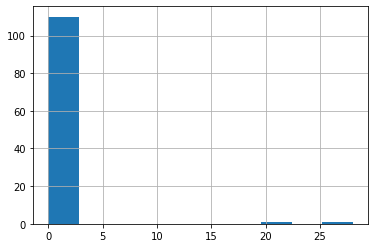

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count